https://github.com/GoodNotes/GNHK-dataset/blob/main/gnhk_paper.pdf

GoodNotes Handwriting Kollection (GNHK), which contains 687 document images with 172,936 characters, 39,026 texts and 9,363 lines. Note that
“texts” defined in this paper include words, ASCII symbols and math expressions.

### Dataset Statistics

Among the 687 images in the dataset, there are a total of 39,026 texts with
12,341 of them being unique. The median number of texts per image is 57 and
the mean is 44.

### Benchmark
Building upon works in scene text, we evaluated the dataset with different
state-of-the-art methods in localisation and recognition. Specifically, instance
segmentation with Mask R-CNN frameworks were used to localise handwritten text and the Clova AI deep text recognition framework to perform
text recognition.

#### Text localisation benchmark

We modelled the text localisation task using instance segmentation problem where the Mask R-CNN framework was used as a baseline. Our dataset does not contain pixel-level segmentation masks separate between word vs non-word. To circumvent this issue, given the polygon around each word, the maximum and minimum points in the x and y direction of each polygon were used as the bounding box for the R-CNN component of the Mask R-CNN framework. The polygon itself was then used as the segmentation mask.

The text localisation task was built upon the detectron2 framework. The network consisted of a backbone of a ResNet-50 with FPN pretrained
on ImageNet. Furthermore, the whole network was pretrained on the MS COCO dataset for segmentation. We compared the results of the Mask R-CNN to
Faster R-CNN within the same detectron2 framework.


#### Text recognition benchmark

We modelled the text recognition benchmark as a segmented offline handwriting recognition problem. That is, the ground truth bounding boxes for each
word are used to crop word images and the word images are fed into a neural network to predict the corresponding text. Recent works have demonstrated segmentation free offline handwriting recognition however considering that our dataset includes content other than handwritten text, we opted with a segmented offline handwriting recognition framework. 
We leveraged Clova AI’s deep text recognition framework for scene text to assess the handwriting recognition component. Clova AI’s deep text recognition framework consists of four major components: transformation, feature extraction, sequence modelling, and prediction. 

Component | Configurations

Transformations |{None, TPS}

Sequence | {None, BiLSTM}

Prediction | {CTC, Attention}

In [3]:
# import numpy as np
# import cv2

# # read image
# img = cv2.imread('E:\OCR\Gangababu_OCR\receipt.png')

In [ ]:
# # thresholding
# blur = cv2.GaussianBlur(img, (5,5), 1)
# hls = cv2.cvtColor(blur, cv2.COLOR_BGR2HLS)
# low = np.array([0, 70, 0])
# high = np.array([255, 255, 85])
# thresh = cv2.inRange(hls, low, high)

# # morphological operations to get the paper
# kclose = np.ones((3,3), dtype=np.uint8)
# kopen = np.ones((5,5), dtype=np.uint8)
# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kclose, iterations=2)
# opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kopen, iterations=6)

# # corner detection
# opening = cv2.GaussianBlur(opening, (3,3), 1)
# opening = np.float32(opening)
# dst = cv2.cornerHarris(opening, 2, 3, 0.04)

# # drawing corners
# dst = cv2.dilate(dst, None)
# img[dst>0.01*dst.max()]=[0,0,255]

# cv2.imshow('Corners', img)
# cv2.waitKey(0)

In [1]:
import cv2
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from imutils import paths

In [2]:
images = sorted(list(glob.glob(r"E:\OCR\Gangababu_OCR\GNHK\train\*.jpg")))
len(images)

515

In [3]:
jsons = sorted(glob.glob(r"E:\OCR\Gangababu_OCR\GNHK\train\*.json"))
len(jsons)

515

In [8]:
images[0]

'E:\\OCR\\Gangababu_OCR\\GNHK\\train\\eng_AF_001.jpg'

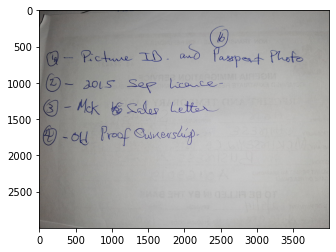

In [9]:
plt.imshow(plt.imread(images[0]))
plt.show()

In [10]:
jsons[0]

'E:\\OCR\\Gangababu_OCR\\GNHK\\train\\eng_AF_001.json'

In [11]:
sample_json = pd.read_json(jsons[0])

In [12]:
sample_json

text                                            polygon  line_idx  \
0      %math%  {'x0': 112, 'y0': 556, 'x1': 285, 'y1': 563, '...         1   
1      %math%  {'x0': 2365, 'y0': 202, 'x1': 2350, 'y1': 509,...         0   
2     Picture  {'x0': 578, 'y0': 549, 'x1': 614, 'y1': 715, '...         1   
3         ID.  {'x0': 1375, 'y0': 556, 'x1': 1426, 'y1': 704,...         1   
4         and  {'x0': 1942, 'y0': 596, 'x1': 1942, 'y1': 668,...         1   
5    Passport  {'x0': 2408, 'y0': 502, 'x1': 2412, 'y1': 711,...         1   
6       photo  {'x0': 3188, 'y0': 538, 'x1': 3202, 'y1': 729,...         1   
7      %math%  {'x0': 130, 'y0': 859, 'x1': 314, 'y1': 888, '...         2   
8        2015  {'x0': 635, 'y0': 957, 'x1': 610, 'y1': 1087, ...         2   
9         sep  {'x0': 1242, 'y0': 931, 'x1': 1202, 'y1': 1069...         2   
10    license  {'x0': 1794, 'y0': 928, 'x1': 1805, 'y1': 1083...         2   
11     %math%  {'x0': 119, 'y0': 1220, 'x1': 274, 'y1': 1245,...         3   
12        Mck  {'x0': 567, 'y0': 1224, 'x1': 516, 'y1': 1394,...         3   
13       %SC%  {'x0': 1004, 'y0': 1260, 'x1': 996, 'y1': 1430...         3   
14      Sales  {'x0': 1220, 'y0': 1253, 'x1': 1213, 'y1': 143...         3   
15     Letter  {'x0': 1834, 'y0': 1245, 'x1': 1816, 'y1': 140...         3   
16     %math%  {'x0': 83, 'y0': 1578, 'x1': 260, 'y1': 1621, ...         4   
17        Old  {'x0': 473, 'y0': 1668, 'x1': 679, 'y1': 1664,...         4   
18      Proof  {'x0': 845, 'y0': 1592, 'x1': 859, 'y1': 1809,...         4   
19  ownership  {'x0': 1347, 'y0': 1606, 'x1': 2238, 'y1': 157...         4   

   type  
0     H  
1     H  
2     H  
3     H  
4     H  
5     H  
6     H  
7     H  
8     H  
9     H  
10    H  
11    H  
12    H  
13    H  
14    H  
15    H  
16    H  
17    H  
18    H  
19    H

In [13]:
sample_json.polygon[0]

{'x0': 112,
 'y0': 556,
 'x1': 285,
 'y1': 563,
 'x2': 245,
 'y2': 776,
 'x3': 112,
 'y3': 783}

In [14]:
sample_json.polygon[0].keys()

dict_keys(['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3'])

In [15]:
sample_json.polygon[0].values()

dict_values([112, 556, 285, 563, 245, 776, 112, 783])

In [16]:
sample_json.polygon[0]['x0']

112

In [17]:
pts = list(sample_json.polygon[0].values())
pts

[112, 556, 285, 563, 245, 776, 112, 783]

In [18]:
sample_image = cv2.imread(images[0])

In [19]:
isClosed = True

In [20]:
pts

[112, 556, 285, 563, 245, 776, 112, 783]

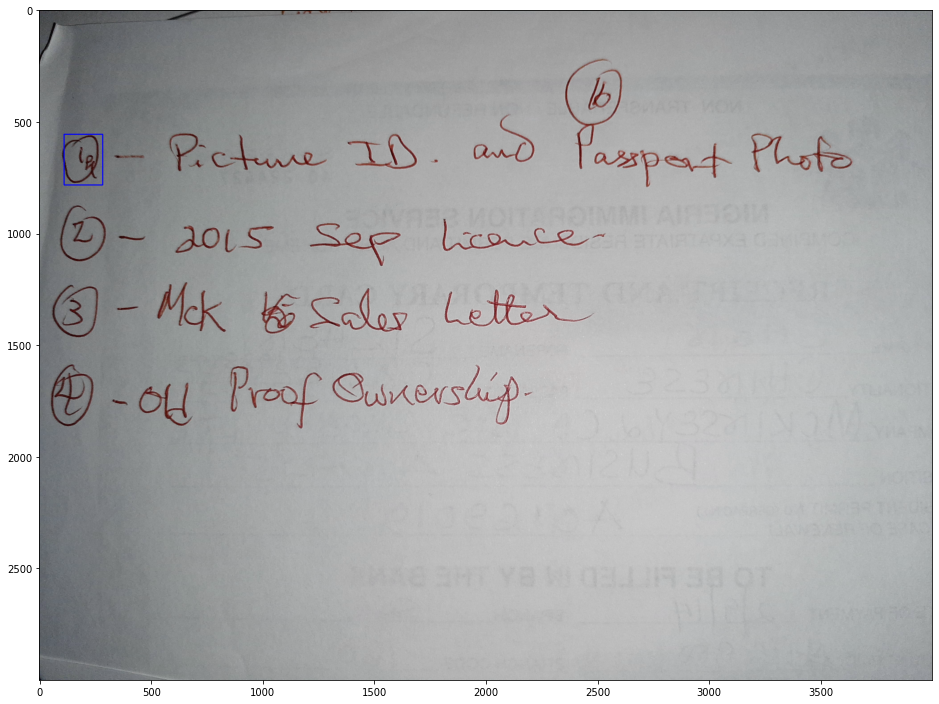

In [21]:
sample_image = cv2.imread(images[0])
rec = cv2.rectangle(sample_image, (112,556), (285,783), (0, 0, 255), 4) 
# rec2 = cv2.rectangle(sample_image, (112,556), (285,783), (0, 0, 255), 4) 
# text = cv2.putText(rec, df.loc[i,'class'], (765,126-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(16,16))    
plt.imshow(rec)
# plt.axis('off')
plt.show()

In [22]:
sample_json.polygon[2]

{'x0': 578,
 'y0': 549,
 'x1': 614,
 'y1': 715,
 'x2': 1292,
 'y2': 747,
 'x3': 1303,
 'y3': 516}

In [23]:
sample_json.polygon[2].values()

dict_values([578, 549, 614, 715, 1292, 747, 1303, 516])

In [24]:
polygon = list(sample_json.polygon[2].values())
polygon

[578, 549, 614, 715, 1292, 747, 1303, 516]

In [25]:
coordinates = np.array(polygon,np.int32).reshape(4,2)
coordinates

array([[ 578,  549],
       [ 614,  715],
       [1292,  747],
       [1303,  516]])

In [26]:
coordinates[0]

array([578, 549])

In [27]:
# coordinates = np.array([[195,3313],[195,4222],[1120,4222],[1120,4473],[1553,4473],[1553,3313]], np.int32)

image_1 = cv2.polylines(sample_image, [coordinates], True, (0,255,0), 10)
cv2.imwrite("grouped_bboxes.jpg", image_1)

True

In [28]:
sample_json.text[2]

'Picture'

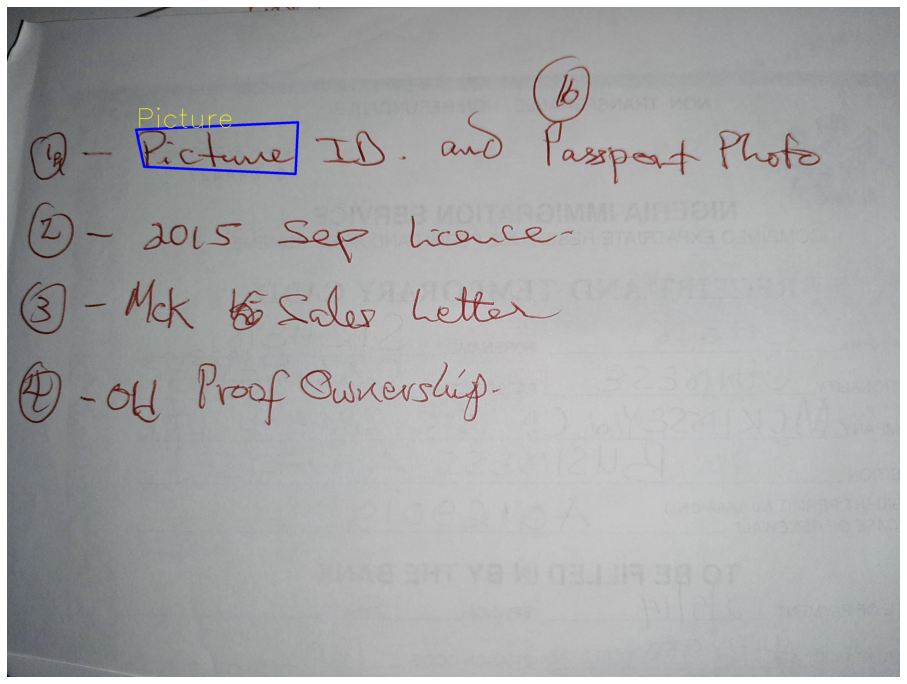

In [29]:
sample_image = cv2.imread(images[0])
image_1 = cv2.polylines(sample_image, [coordinates], True, (0,0,255), 10)
text = cv2.putText(image_1, sample_json.text[2], (578,549-10), cv2.FONT_HERSHEY_SIMPLEX,4, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(16,16))    
plt.imshow(text)
plt.axis('off')
plt.show()

In [30]:
len(sample_json.text)

20

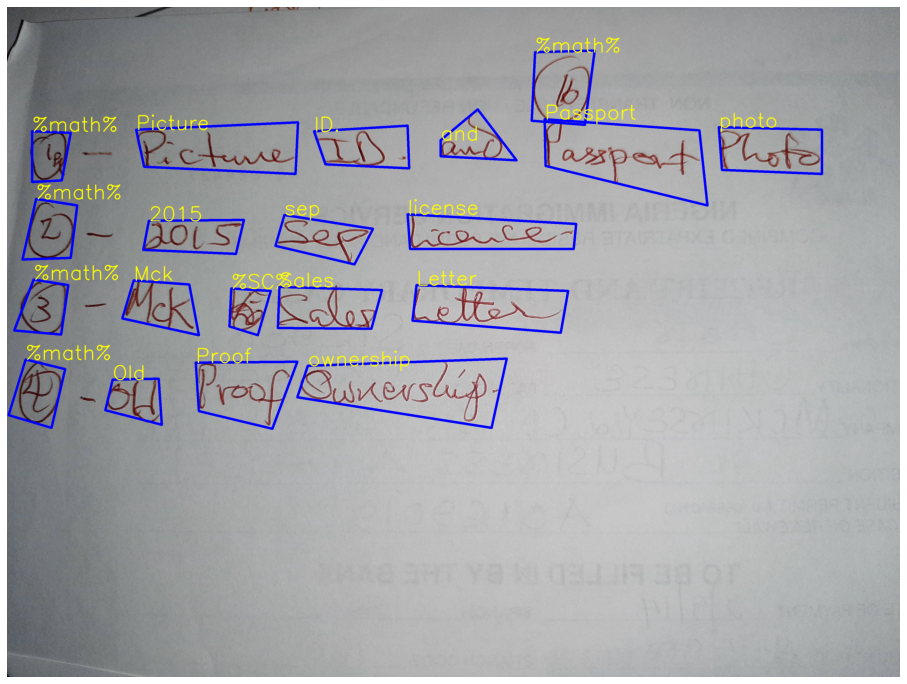

In [31]:
# font = cv2.FONT_HERSHEY_DUPLEX # FONT_HERSHEY_SIMPLEX
font = cv2.FONT_HERSHEY_SIMPLEX # FONT_HERSHEY_SIMPLEX
sample_image = cv2.imread(images[0])
boxes = len(sample_json.text)

for i in range(boxes):
        polygon = list(sample_json.polygon[i].values())
        coordinates = np.array(polygon,np.int32).reshape(4,2)
        image_1 = cv2.polylines(sample_image, [coordinates], True, (0,0,255), 10)
        text = cv2.putText(image_1, sample_json.text[i], coordinates[0], font,3, (255,255,0), 3, cv2.LINE_AA)
    
plt.figure(figsize=(16,16))    
plt.imshow(text)
plt.axis('off')
plt.show()

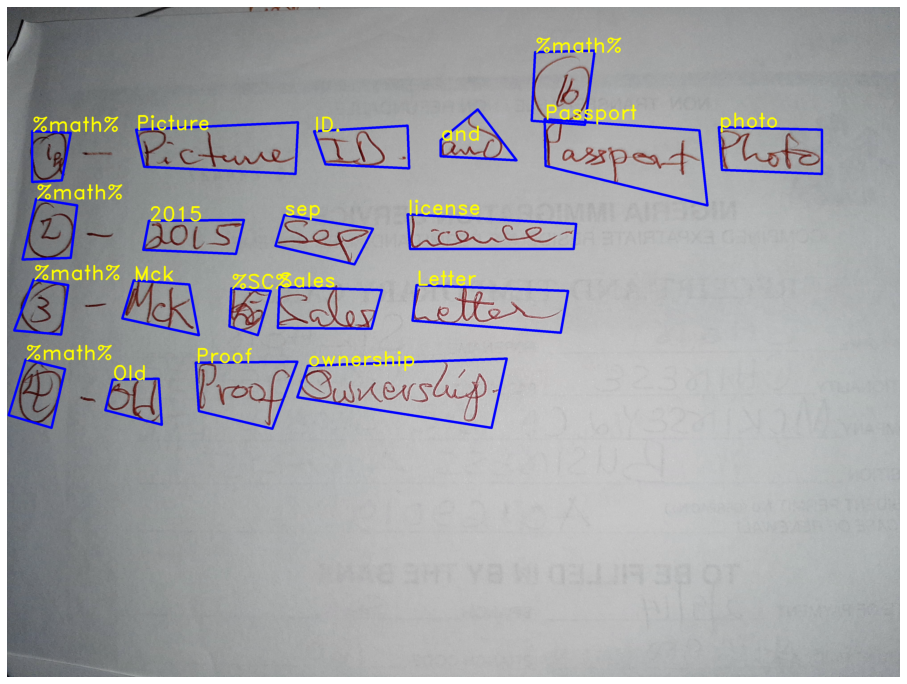

In [32]:
font = cv2.FONT_HERSHEY_DUPLEX # FONT_HERSHEY_SIMPLEX
# font = cv2.FONT_HERSHEY_SIMPLEX # FONT_HERSHEY_SIMPLEX
sample_image = cv2.imread(images[0])
boxes = len(sample_json.text)

for i in range(boxes):
        polygon = list(sample_json.polygon[i].values())
        coordinates = np.array(polygon,np.int32).reshape(4,2)
        image_1 = cv2.polylines(sample_image, [coordinates], True, (0,0,255), 10)
        text = cv2.putText(image_1, sample_json.text[i], coordinates[0], font,3, (255,255,0), 3, cv2.LINE_AA)
    
plt.figure(figsize=(16,16))    
plt.imshow(text)
plt.axis('off')
plt.show()

(1080, 1198, 3)


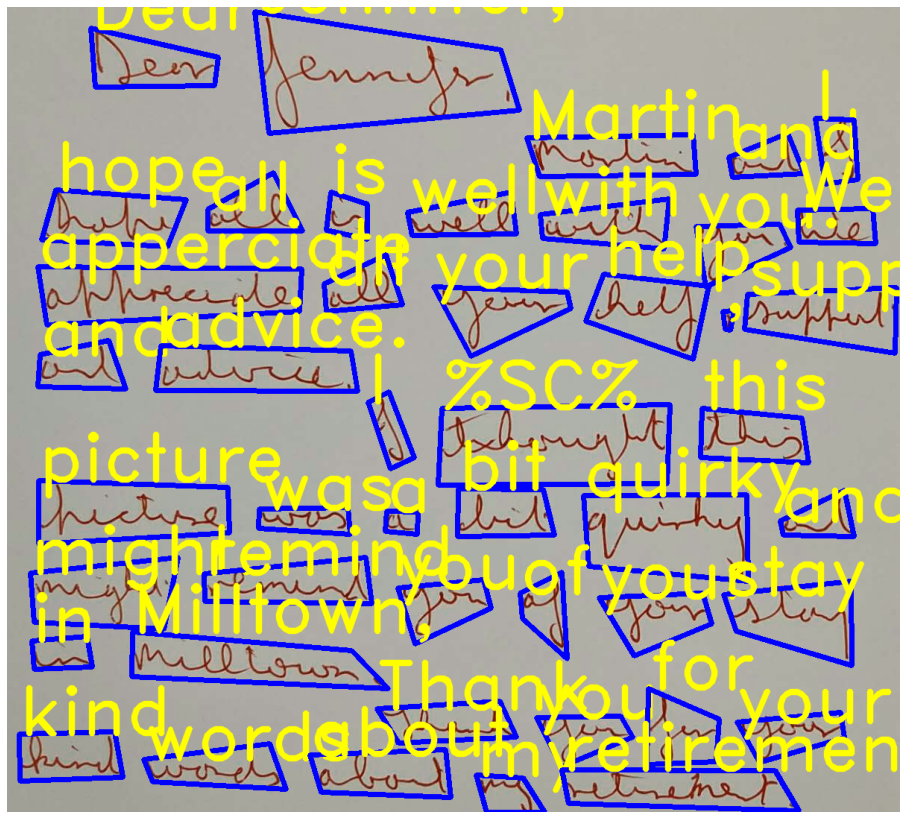

In [33]:
n = int(input('Which file would you like to visualise : '))
sample_image = cv2.imread(images[n])
sample_json = pd.read_json(jsons[n])

print(sample_image.shape)
font = cv2.FONT_HERSHEY_DUPLEX # FONT_HERSHEY_SIMPLEX
# font = cv2.FONT_HERSHEY_SIMPLEX # FONT_HERSHEY_SIMPLEX

boxes = len(sample_json.text)

for i in range(boxes):
        polygon = list(sample_json.polygon[i].values())
        coordinates = np.array(polygon,np.int32).reshape(4,2)
        image_1 = cv2.polylines(sample_image, [coordinates], True, (0,0,255), 5)
        text = cv2.putText(image_1, sample_json.text[i], coordinates[0], font,3, (255,255,0), 3, cv2.LINE_AA)
    
plt.figure(figsize=(16,16))    
plt.imshow(text)
plt.axis('off')
plt.show()

# Testing

In [4]:
sample_image = cv2.imread(images[0])

In [5]:
import matplotlib.image as mpimg

In [6]:
sample_image = mpimg.imread(images[0])

In [7]:
imgplot = sample_image[:, :, 0]

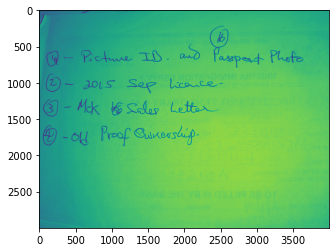

In [8]:
plt.imshow(imgplot)

In [9]:
imgplot[imgplot>90] = 0

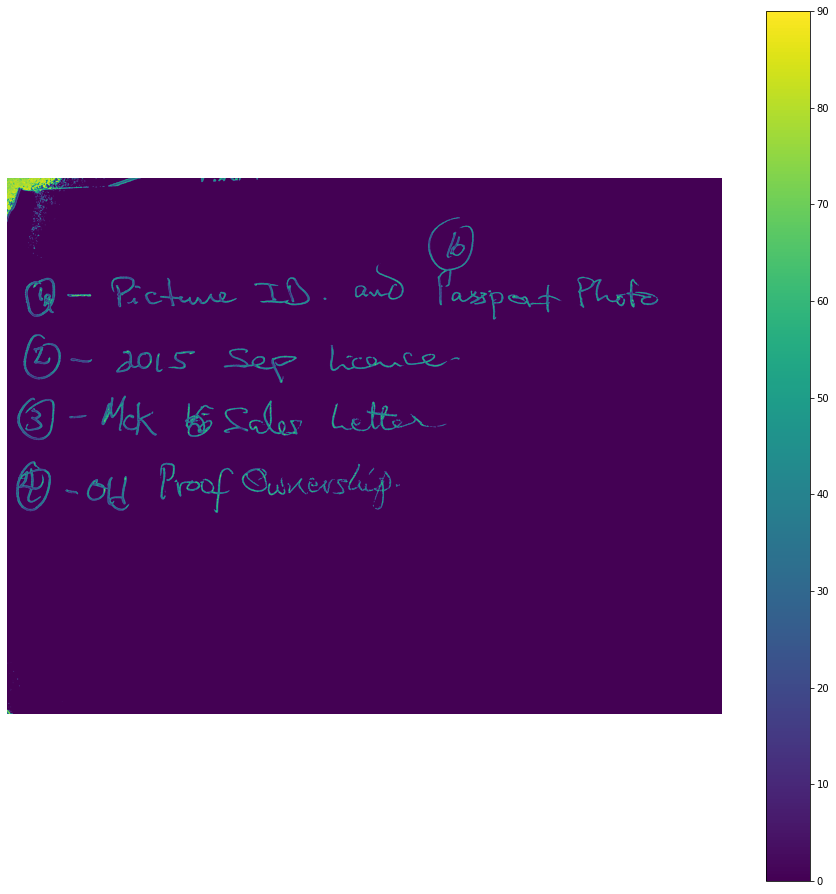

In [10]:
plt.figure(figsize=(16,16))   
plt.rcParams["figure.autolayout"] = True
plt.axis('off')
plt.imshow(imgplot)
plt.colorbar()

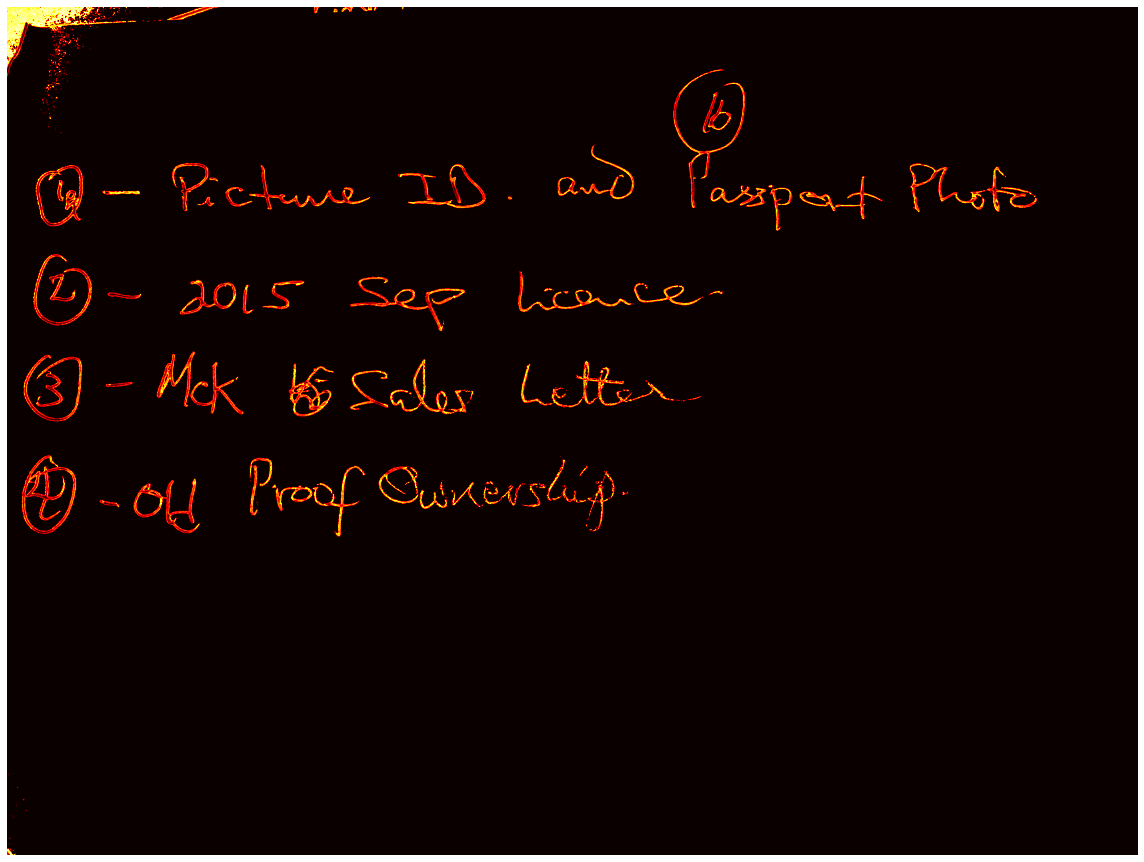

In [11]:
plt.figure(figsize=(16,16))    
plt.imshow(imgplot, cmap="hot")
plt.axis('off')
plt.show()

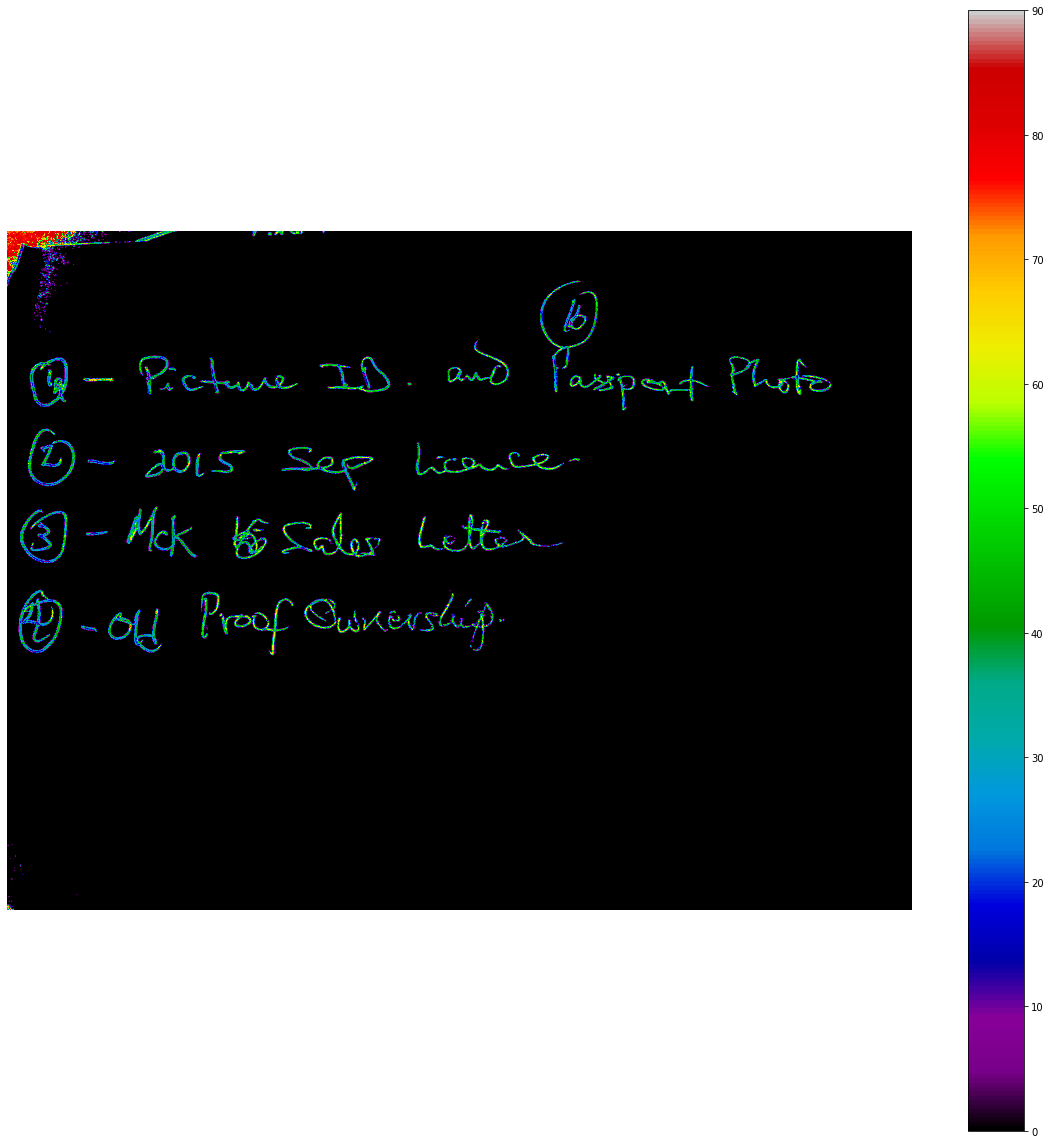

In [12]:
plt.figure(figsize=(16,16))
plt.axis('off')
imgplot2 = plt.imshow(imgplot)
imgplot2.set_cmap('nipy_spectral')
plt.colorbar()


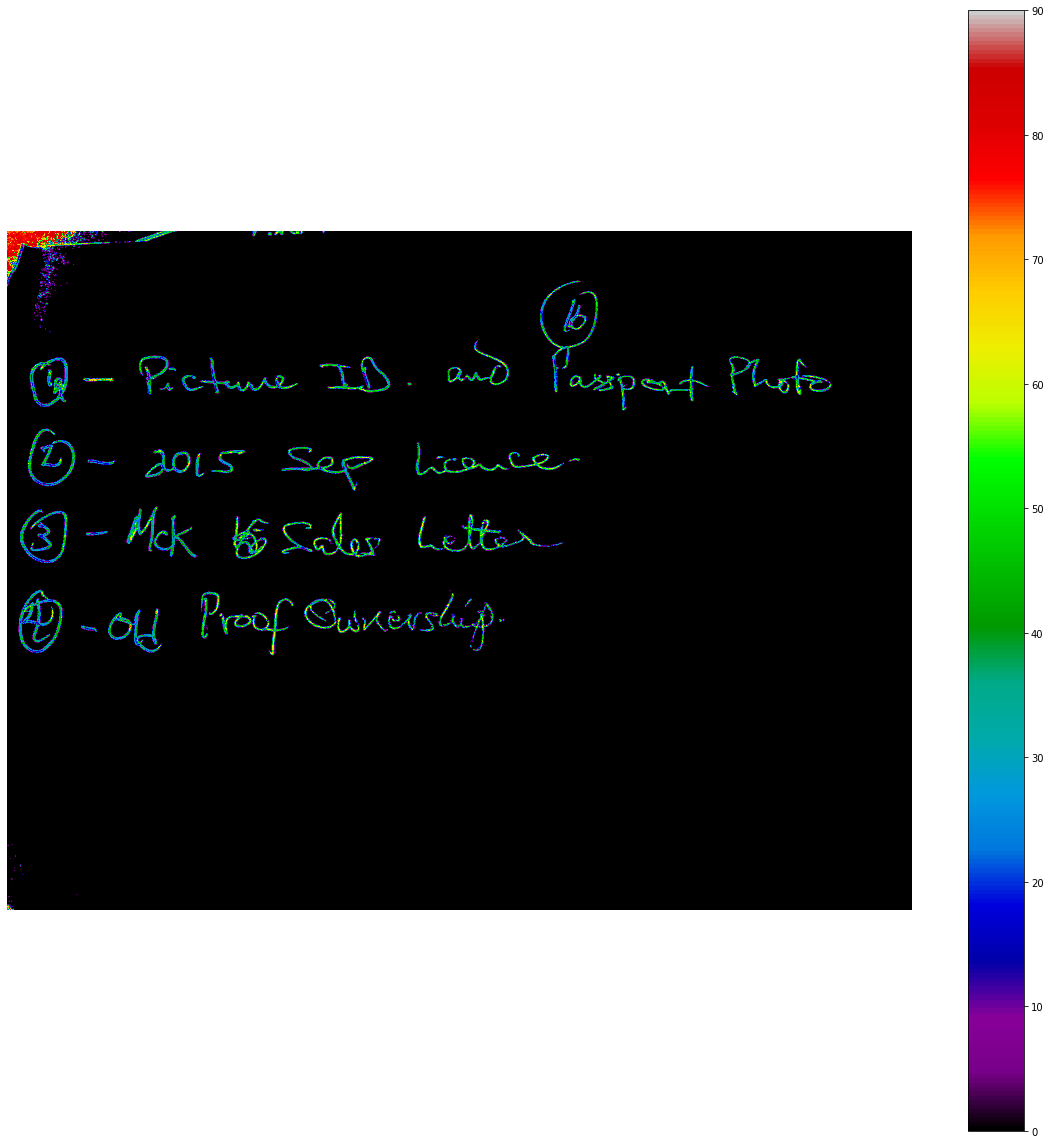

In [70]:
plt.figure(figsize=(16,16))
plt.axis('off')
imgplot2 = plt.imshow(imgplot)
imgplot2.set_cmap('nipy_spectral')
plt.colorbar()

# Polygon Bounding Box & Mask

https://programtalk.com/python-more-examples/detectron2.structures.ImageList.from_tensors/

ImageList.from_tensors

In [16]:
from PIL import Image
from dask import bag, diagnostics
import cv2
import glob
import json
import pandas as pd
from PIL import Image
from dask import bag, diagnostics
import matplotlib.pyplot as plt
import numpy as np
# For Colab users
# from google.colab.patches import cv2_imshow

In [17]:
import matplotlib.image as mpimg

In [18]:
def faster_get_dims(file):
    dims = Image.open(file).size
    return dims

dfile_list = glob.glob(r"E:\OCR\Gangababu_OCR\GNHK\train\*.jpg")
dfile_list += glob.glob(r'E:\OCR\Gangababu_OCR\GNHK\test\*.jpg')
dfile_list = sorted(dfile_list)
print(f"Getting dimensions for {len(dfile_list)} files.")
djson_list = glob.glob(r"E:\OCR\Gangababu_OCR\GNHK\train\*.json")
djson_list += glob.glob(r'E:\OCR\Gangababu_OCR\GNHK\test\*.json')
djson_list = sorted(djson_list)
print(f"Getting annotations for {len(djson_list)} files.")

# parallelize
dfile_bag = bag.from_sequence(dfile_list).map(faster_get_dims)
dfile_bag_list = bag.from_sequence(dfile_list)
djson_bag = bag.from_sequence(djson_list)

with diagnostics.ProgressBar():
    image_dims = dfile_bag.compute()
    images = dfile_bag_list.compute()
    annotations = djson_bag.compute()

Getting dimensions for 687 files.
Getting annotations for 687 files.
[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


(3000, 4000, 3)


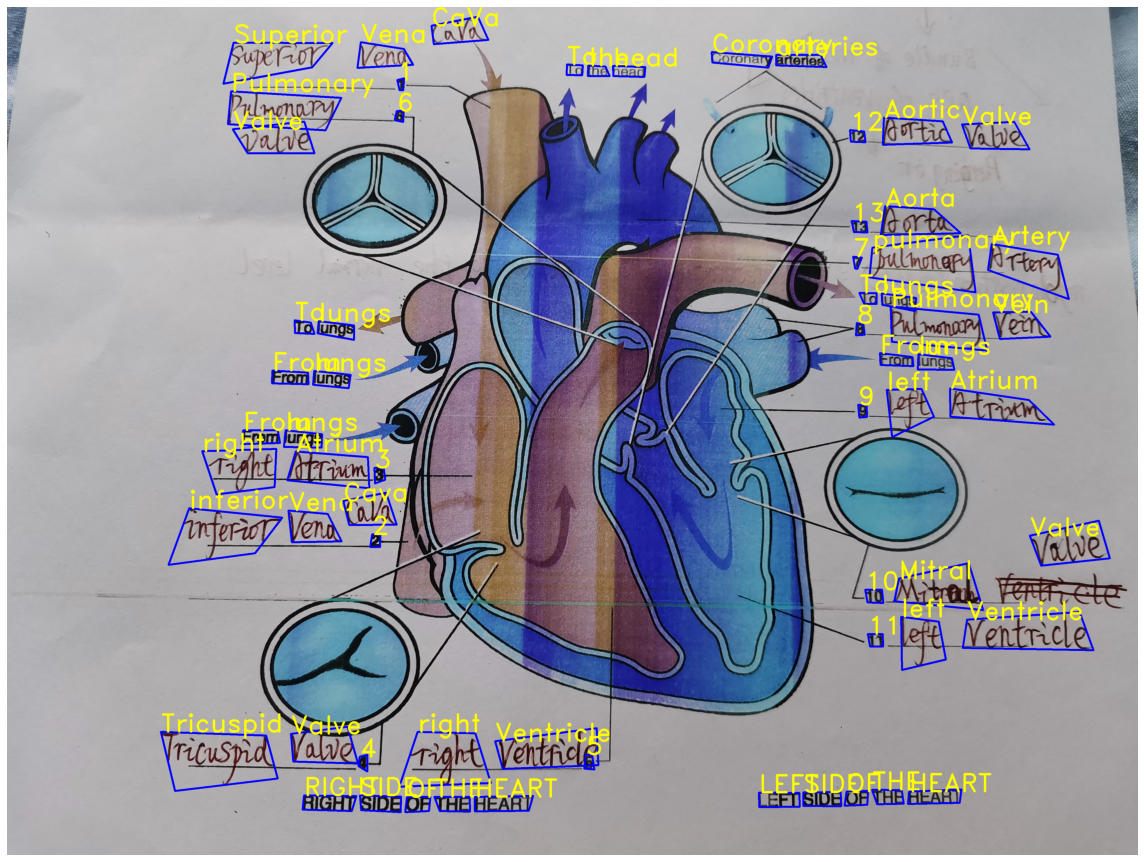

In [37]:
n = int(input('Which file would you like to visualize : '))
sample_image = cv2.imread(images[n])
sample_json = pd.read_json(annotations[n])

print(sample_image.shape)
font = cv2.FONT_HERSHEY_DUPLEX # FONT_HERSHEY_SIMPLEX
# font = cv2.FONT_HERSHEY_SIMPLEX # FONT_HERSHEY_SIMPLEX

boxes = len(sample_json.text)

for i in range(boxes):
        polygon = list(sample_json.polygon[i].values())
        coordinates = np.array(polygon,np.int32).reshape(4,2)
        image_1 = cv2.polylines(sample_image, [coordinates], True, (0,0,255), 5)
        text = cv2.putText(image_1, sample_json.text[i], coordinates[0], font,3, (255,255,0), 3, cv2.LINE_AA)
    
plt.figure(figsize=(16,16))    
plt.imshow(image_1)
plt.axis('off')
plt.show()

In [38]:
sample_json

text                                            polygon  line_idx type
0   Superior  {'x0': 801, 'y0': 126, 'x1': 1151, 'y1': 127, ...         1    H
1       Vena  {'x0': 1251, 'y0': 124, 'x1': 1403, 'y1': 148,...         1    H
2       CaVa  {'x0': 1501, 'y0': 66, 'x1': 1665, 'y1': 34, '...         0    H
3         To  {'x0': 1980, 'y0': 203, 'x1': 2036, 'y1': 206,...         3    P
4        the  {'x0': 2055, 'y0': 207, 'x1': 2116, 'y1': 210,...         3    P
..       ...                                                ...       ...  ...
60      LEFT  {'x0': 2659, 'y0': 2779, 'x1': 2802, 'y1': 278...        24    P
61      SIDE  {'x0': 2816, 'y0': 2778, 'x1': 2948, 'y1': 277...        24    P
62        OF  {'x0': 2969, 'y0': 2775, 'x1': 3045, 'y1': 277...        24    P
63       THE  {'x0': 3059, 'y0': 2769, 'x1': 3164, 'y1': 277...        24    P
64     HEART  {'x0': 3190, 'y0': 2775, 'x1': 3375, 'y1': 276...        24    P

[65 rows x 4 columns]

In [39]:
polygon = list(sample_json.polygon[0].values())
coordinates = np.array(polygon,np.int32).reshape(4,2)
coordinates

array([[ 801,  126],
       [1151,  127],
       [1079,  213],
       [ 765,  271]])

In [40]:
rect = cv2.boundingRect(coordinates) # Crop the Bounding Rectangle
x,y,w,h = rect

In [107]:
n = 344
sample_image = cv2.imread(images[n])

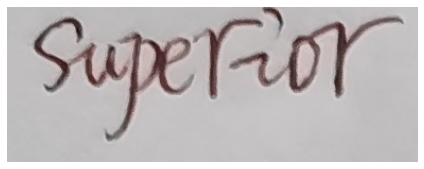

In [108]:
cropped = sample_image[y:y+h, x:x+w].copy()
plt.imshow(cropped)
plt.axis('off')
plt.show()

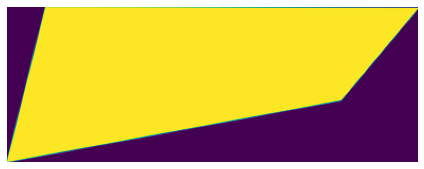

In [109]:
## (2) make mask
coordinates = coordinates - coordinates.min(axis=0)
mask = np.zeros(cropped.shape[:2], np.uint8)
masks = cv2.drawContours(mask, [coordinates], -1, (255, 255, 255), -1, cv2.LINE_AA)
plt.imshow(masks)
plt.axis('off')
plt.show()

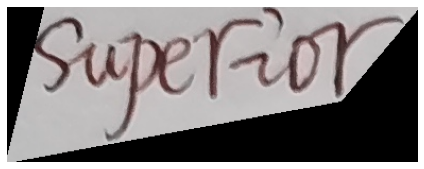

In [110]:
dst = cv2.bitwise_and(cropped, cropped, mask=mask) ## (3) do bit-op
plt.imshow(dst)
plt.axis('off')
plt.show()

In [111]:
type(dst)

numpy.ndarray

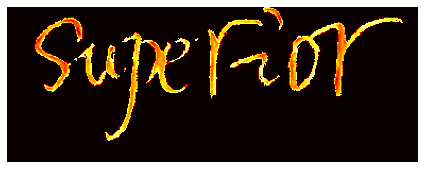

In [112]:
fire_Mask = dst.copy()
fire_Mask = fire_Mask[:, :, 0]
fire_Mask[fire_Mask>130] = 0
# plt.figure(figsize=(16,16))    
plt.imshow(fire_Mask, cmap="hot")
plt.axis('off')
plt.show()

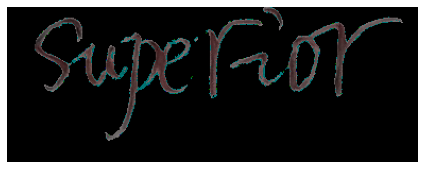

In [114]:
fire_Mask = dst.copy()
# fire_Mask = fire_Mask[:, :, 0]
fire_Mask[fire_Mask>130] = 0
# plt.figure(figsize=(16,16))    
plt.imshow(fire_Mask)
plt.axis('off')
plt.show()

In [67]:
fire_Mask.shape

(146, 387)

In [98]:
# import sys
# import numpy as np
# np.set_printoptions(threshold=sys.maxsize)

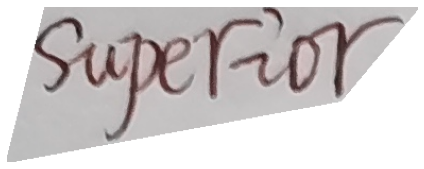

In [64]:
## (4) add the white background
bg = np.ones_like(cropped, np.uint8)*255
cv2.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst
plt.imshow(dst2)
plt.axis('off')
plt.show()

In [85]:
len(sample_image)

3000

In [86]:
len(cropped)

146

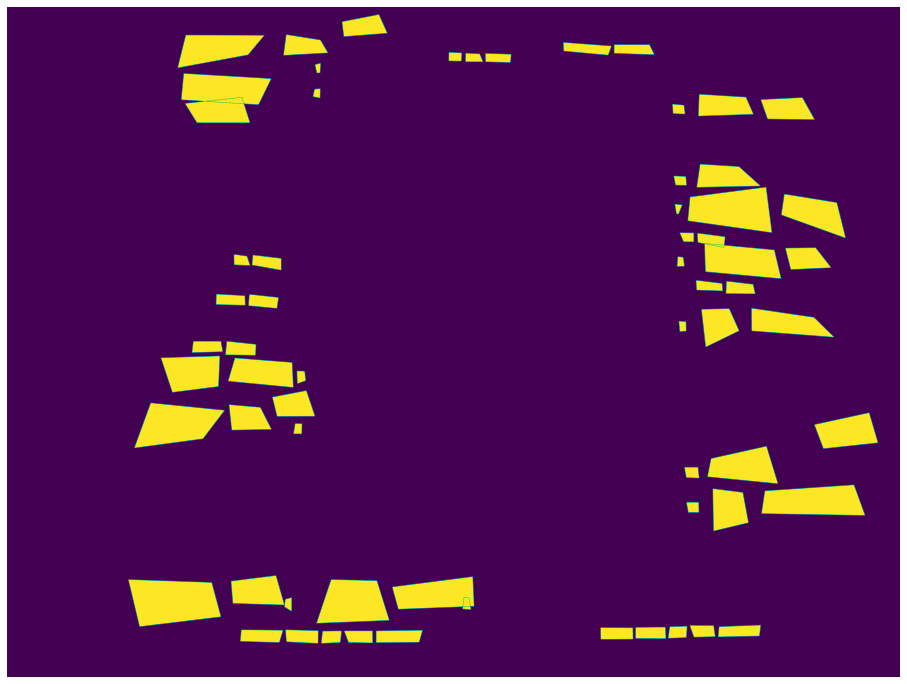

In [23]:
n = int(input('For which file would you like to visualize the Mask : '))
sample_image = cv2.imread(images[n])
sample_json = pd.read_json(annotations[n])

boxes = len(sample_json.text)
masked = 0
for i in range(boxes):
        polygon = list(sample_json.polygon[i].values())
        coordinates = np.array(polygon,np.int32).reshape(4,2)
        # coordinates = coordinates - coordinates.min(axis=0) ## (2) make mask
        mask_zeros = np.zeros(sample_image.shape[:2], np.uint8)
        masked += cv2.drawContours(mask_zeros, [coordinates], -1, (255, 255, 255), -1, cv2.LINE_AA)
    
plt.figure(figsize=(16,16))    
plt.imshow(masked)
plt.axis('off')
plt.show()

# cv2_imshow(masked)

In [131]:
images[0]

'E:\\OCR\\Gangababu_OCR\\GNHK\\test\\eng_AF_004.jpg'

In [132]:
annotations[0]

'E:\\OCR\\Gangababu_OCR\\GNHK\\test\\eng_AF_004.json'

In [229]:
df = pd.read_json(annotations[0])
df

text                                            polygon  line_idx  \
0         what  {'x0': 785, 'y0': 343, 'x1': 1104, 'y1': 322, ...         2   
1            I  {'x0': 1186, 'y0': 339, 'x1': 1327, 'y1': 301,...         2   
2         hope  {'x0': 1460, 'y0': 320, 'x1': 1767, 'y1': 394,...         2   
3           to  {'x0': 1942, 'y0': 336, 'x1': 2080, 'y1': 338,...         2   
4      achieve  {'x0': 2216, 'y0': 339, 'x1': 2678, 'y1': 345,...         2   
5       during  {'x0': 2799, 'y0': 289, 'x1': 3254, 'y1': 285,...         2   
6         this  {'x0': 3306, 'y0': 318, 'x1': 3582, 'y1': 340,...         2   
7       period  {'x0': 784, 'y0': 540, 'x1': 1217, 'y1': 507, ...         3   
8           of  {'x0': 1401, 'y0': 565, 'x1': 1524, 'y1': 568,...         3   
9   memtorship  {'x0': 1711, 'y0': 500, 'x1': 2531, 'y1': 512,...         3   
10      %math%  {'x0': 527, 'y0': 898, 'x1': 652, 'y1': 898, '...         4   
11     improve  {'x0': 745, 'y0': 927, 'x1': 1246, 'y1': 964, ...         4   
12          my  {'x0': 1347, 'y0': 945, 'x1': 1559, 'y1': 958,...         4   
13         and  {'x0': 2375, 'y0': 956, 'x1': 2660, 'y1': 890,...         4   
14     writing  {'x0': 2749, 'y0': 859, 'x1': 3243, 'y1': 871,...         4   
15      %math%  {'x0': 490, 'y0': 1121, 'x1': 646, 'y1': 1121,...         5   
16       Learn  {'x0': 759, 'y0': 1092, 'x1': 1139, 'y1': 1158...         5   
17         how  {'x0': 1327, 'y0': 1139, 'x1': 1612, 'y1': 115...         5   
18          to  {'x0': 1708, 'y0': 1114, 'x1': 1844, 'y1': 112...         5   
19         run  {'x0': 1980, 'y0': 1151, 'x1': 2196, 'y1': 115...         5   
20           a  {'x0': 2315, 'y0': 1146, 'x1': 2398, 'y1': 114...         5   
21    business  {'x0': 2576, 'y0': 1095, 'x1': 3238, 'y1': 111...         5   
22      things  {'x0': 649, 'y0': 1310, 'x1': 1108, 'y1': 1312...         6   
23           i  {'x0': 1369, 'y0': 1337, 'x1': 1392, 'y1': 133...         6   
24        need  {'x0': 1563, 'y0': 1350, 'x1': 1896, 'y1': 130...         6   
25          to  {'x0': 2116, 'y0': 1316, 'x1': 2231, 'y1': 133...         6   
26          do  {'x0': 2403, 'y0': 1304, 'x1': 2562, 'y1': 130...         6   
27        Have  {'x0': 590, 'y0': 1522, 'x1': 955, 'y1': 1541,...         7   
28           a  {'x0': 1127, 'y0': 1563, 'x1': 1223, 'y1': 156...         7   
29     writing  {'x0': 1386, 'y0': 1520, 'x1': 1952, 'y1': 151...         7   
30        time  {'x0': 2046, 'y0': 1499, 'x1': 2433, 'y1': 150...         7   
31         and  {'x0': 2552, 'y0': 1531, 'x1': 2846, 'y1': 145...         7   
32         day  {'x0': 2981, 'y0': 1456, 'x1': 3272, 'y1': 149...         7   
33    setaside  {'x0': 3348, 'y0': 1451, 'x1': 3914, 'y1': 143...         7   
34       Apply  {'x0': 577, 'y0': 1726, 'x1': 969, 'y1': 1719,...         8   
35          th  {'x0': 1139, 'y0': 1747, 'x1': 1306, 'y1': 175...         8   
36        free  {'x0': 1469, 'y0': 1719, 'x1': 1760, 'y1': 174...         8   
37     writing  {'x0': 1895, 'y0': 1708, 'x1': 2489, 'y1': 169...         8   
38     courses  {'x0': 2625, 'y0': 1693, 'x1': 3154, 'y1': 168...         8   
39       Apply  {'x0': 620, 'y0': 1942, 'x1': 999, 'y1': 1969,...         9   
40         for  {'x0': 1175, 'y0': 1922, 'x1': 1348, 'y1': 192...         9   
41        free  {'x0': 1498, 'y0': 1913, 'x1': 1765, 'y1': 192...         9   
42     pattern  {'x0': 1960, 'y0': 1897, 'x1': 2535, 'y1': 187...         9   
43     courses  {'x0': 2757, 'y0': 1864, 'x1': 3303, 'y1': 187...         9   
44       learn  {'x0': 622, 'y0': 2106, 'x1': 1038, 'y1': 2169...        10   
45         how  {'x0': 1326, 'y0': 2093, 'x1': 1590, 'y1': 215...        10   
46          to  {'x0': 1714, 'y0': 2095, 'x1': 1852, 'y1': 209...        10   
47         use  {'x0': 1999, 'y0': 2108, 'x1': 2186, 'y1': 210...        10   
48       canvo  {'x0': 2351, 'y0': 2093, 'x1': 2692, 'y1': 210...        10   
49       Date:  {'x0': 721, 'y0': 132, 'x1': 1001, 'y1': 130

In [231]:
boxes = len(df)
boxes

53

In [232]:
labels = len(annotations)
labels

687

In [236]:
boxes = len(df)
for i in range(boxes):
        polygon = list(df.polygon[i].values())
        coordinates = np.array(polygon,np.int32).reshape(4,2).tolist()
        df.polygon[i] = coordinates

C:\Users\GANGAB~1.M\AppData\Local\Temp/ipykernel_7176/102389100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.polygon[i] = coordinates


In [240]:
dfs = []
for j in range(labels):
        df = pd.read_json(annotations[j])
        df['file_no'] = j
        dfs.append(df)

In [245]:
nfiles = len(dfs)

for j in range(nfiles):
        df = dfs[j]
        boxes = len(df)
        for i in range(boxes):
                polygon = list(df.polygon[i].values())
                coordinates = np.array(polygon,np.int32).reshape(4,2).tolist()
                df.polygon[i] = coordinates

C:\Users\GANGAB~1.M\AppData\Local\Temp/ipykernel_7176/1687499889.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.polygon[i] = coordinates


In [248]:
Master_stack = pd.concat(dfs, axis=0)

In [249]:
Master_stack

text                                            polygon  line_idx  \
0       what  [[785, 343], [1104, 322], [1082, 466], [787, 4...         2   
1          I  [[1186, 339], [1327, 301], [1329, 423], [1205,...         2   
2       hope  [[1460, 320], [1767, 394], [1734, 518], [1438,...         2   
3         to  [[1942, 336], [2080, 338], [2078, 446], [1922,...         2   
4    achieve  [[2216, 339], [2678, 345], [2680, 444], [2187,...         2   
..       ...                                                ...       ...   
154   closer  [[712, 1697], [836, 1706], [839, 1738], [703, ...        28   
155       to  [[846, 1700], [911, 1709], [909, 1746], [842, ...        28   
156    death  [[47, 1760], [188, 1752], [188, 1791], [31, 18...        29   
157     than  [[207, 1755], [310, 1756], [314, 1792], [200, ...        29   
158   birth.  [[337, 1753], [474, 1753], [475, 1789], [339, ...        29   

    type  file_no  
0      H        0  
1      H        0  
2      H        0  
3      H        0  
4      H        0  
..   ...      ...  
154    H      686  
155    H      686  
156    H      686  
157    H      686  
158    H      686  

[42561 rows x 5 columns]

In [250]:
Master_stack.text.value_counts()

the        1151
to          836
of          822
and         661
%math%      654
           ... 
diet.         1
amounts       1
fat           1
diet          1
birth.        1
Name: text, Length: 12956, dtype: int64

In [253]:
len(Master_stack.text.value_counts())

12956

# Preprocessing

In [ ]:
from PIL import Image
from dask import bag, diagnostics
import cv2
import glob
import json
import pandas as pd
from PIL import Image
from dask import bag, diagnostics
import matplotlib.pyplot as plt
import numpy as np
# For Colab users
# from google.colab.patches import cv2_imshow

In [ ]:
def faster_get_dims(file):
    dims = Image.open(file).size
    return dims

dfile_list = glob.glob(r"E:\OCR\Gangababu_OCR\GNHK\train\*.jpg")
dfile_list += glob.glob(r'E:\OCR\Gangababu_OCR\GNHK\test\*.jpg')
dfile_list = sorted(dfile_list)
print(f"Getting dimensions for {len(dfile_list)} files.")
djson_list = glob.glob(r"E:\OCR\Gangababu_OCR\GNHK\train\*.json")
djson_list += glob.glob(r'E:\OCR\Gangababu_OCR\GNHK\test\*.json')
djson_list = sorted(djson_list)
print(f"Getting annotations for {len(djson_list)} files.")

# parallelize
dfile_bag = bag.from_sequence(dfile_list).map(faster_get_dims)
dfile_bag_list = bag.from_sequence(dfile_list)
djson_bag = bag.from_sequence(djson_list)

with diagnostics.ProgressBar():
    image_dims = dfile_bag.compute()
    images = dfile_bag_list.compute()
    annotations = djson_bag.compute()

In [271]:
temp = cv2.imread(images[0])
temp.shape

(2322, 4128, 3)

In [282]:
dfs = []
for j in range(labels):
        df = pd.read_json(annotations[j])
        df['img_loc'] = images[j]
        df['label_loc'] = annotations[j]
        temp = cv2.imread(df.img_loc[0]).shape
        df['img_size'] = str(temp)
        dfs.append(df)

In [275]:
dfs[0].img_loc[0]

'E:\\OCR\\Gangababu_OCR\\GNHK\\test\\eng_AF_004.jpg'

In [283]:
nfiles = len(dfs)

for j in range(nfiles):
        df = dfs[j]
        boxes = len(df)
        for i in range(boxes):
                polygon = list(df.polygon[i].values())
                coordinates = np.array(polygon,np.int32).reshape(4,2).tolist()
                df.polygon[i] = coordinates

C:\Users\GANGAB~1.M\AppData\Local\Temp/ipykernel_7176/1053886024.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.polygon[i] = coordinates


In [284]:
Master_stack = pd.concat(dfs, axis=0)

In [285]:
Master_stack

text                                            polygon  line_idx  \
0       what  [[785, 343], [1104, 322], [1082, 466], [787, 4...         2   
1          I  [[1186, 339], [1327, 301], [1329, 423], [1205,...         2   
2       hope  [[1460, 320], [1767, 394], [1734, 518], [1438,...         2   
3         to  [[1942, 336], [2080, 338], [2078, 446], [1922,...         2   
4    achieve  [[2216, 339], [2678, 345], [2680, 444], [2187,...         2   
..       ...                                                ...       ...   
154   closer  [[712, 1697], [836, 1706], [839, 1738], [703, ...        28   
155       to  [[846, 1700], [911, 1709], [909, 1746], [842, ...        28   
156    death  [[47, 1760], [188, 1752], [188, 1791], [31, 18...        29   
157     than  [[207, 1755], [310, 1756], [314, 1792], [200, ...        29   
158   birth.  [[337, 1753], [474, 1753], [475, 1789], [339, ...        29   

    type                                         img_loc  \
0      H   E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.jpg   
1      H   E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.jpg   
2      H   E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.jpg   
3      H   E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.jpg   
4      H   E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.jpg   
..   ...                                             ...   
154    H  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.jpg   
155    H  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.jpg   
156    H  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.jpg   
157    H  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.jpg   
158    H  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.jpg   

                                           label_loc         img_size  
0     E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.json  (2322, 4128, 3)  
1     E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.json  (2322, 4128, 3)  
2     E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.json  (2322, 4128, 3)  
3     E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.json  (2322, 4128, 3)  
4     E:\OCR\Gangababu_OCR\GNHK\test\eng_AF_004.json  (2322, 4128, 3)  
..                                               ...              ...  
154  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.json  (1920, 1080, 3)  
155  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.json  (1920, 1080, 3)  
156  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.json  (1920, 1080, 3)  
157  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.json  (1920, 1080, 3)  
158  E:\OCR\Gangababu_OCR\GNHK\train\eng_NA_146.json  (1920, 1080, 3)  

[42561 rows x 7 columns]